In [1]:
import pandas as pd
import glob
import os
import numpy as np

from functions import *
from plots import *

The aim of this notebook is to visualise relationships between performance in the two-step task and mental-health/cognitive dimensions.

Draft analysis

1. Reproduce Fig 2B from Donegan looking at the probability of staying given the previous reward

1. Correlation IQ and MB index
2. Correlation age and MB index
2. Correlation of all mental health scores with MB index

In [2]:
# Load fully merged data frames

# Load demographic and questionnaires results
dem_quest_dfs = load_data("Overall_Results/Dem_Quest")

# Load raw TST results
tst_dfs = load_data("Overall_Results/Two_Step_Task_Results")

# Load modelling results
modelling_dfs = load_data("Overall_Results/Models")

# Set study to look at
study = "pilot_09_07_25"


The following data frame contains the coefficients of the base model **currStay ~ lastWinRew * lastTranUnc + (lastWinRew * lastTranUnc + 1 | participant_id)** used by Gillan et al. (2016). It provides estimates for the coefficients of "stay", "modelFree", "transition" and "modelBased". These coefficients can be combined with participants age or mental health results to build normative models.

In [3]:
modelling_dfs[f'model_results_gillan_baseline_glmer_{study}']

,intercept_estimate,modelFree_estimate,transition_estimate,modelBased_estimate,participant_id,model_formula
0,0.183629,0.430831,0.032338,-0.052264,572bcdbb34b25a0010ddd977,currStay ~ lastWinRew * lastTranUnc + (lastWin...
1,1.947810,-0.195449,0.163100,0.477872,66d31a1b0515fe747830bab9,currStay ~ lastWinRew * lastTranUnc + (lastWin...


The following data frame looks at how different demographic factors (i.e. age, gender, education) relate to modelBased. It has been used in Donegan et al. (2024) paper. The estimates have then been used for the figure 3D.

The model that was ran to obtain these results is: 

**modelBased_estimate ~ age_z + gender**

In [4]:
modelling_dfs[f'model_results_donegan_demographic_lm_{study}']

,predictor_estimate,std_error,t_value,p_value,predictor,model_formula
0,0.212804,1.584852e-16,1342737444182509,0,(Intercept),modelBased_estimate ~ age_z + gender
1,0.265402,1.586846e-16,1672511512073764,0,age_z,modelBased_estimate ~ age_z + gender


### Symptom based models

The following data frame looks at the interaction of different mental health disorders with the interaction of transition and reward. It has been used in Gillan et al. (2016) paper in Table 1.

The model that was ran to obtain these results is: 

**currStay ~ lastWinRew * lastTranUnc * symptom + lastWinRew * lastTranUnc * (iq_z + age_z + gender) + (lastWinRew * lastTranUnc + 1 | participant_id)**

In [5]:
modelling_dfs[f'model_results_gillan_symptom_glmer_{study}']

,questionnaire,symptom_var,predictor,predictor_estimate,std_error,z_value,p_value,model_formula
0,Eating Disorders,eat_z,lastWinRew:lastTranUnc:eat_z,-0.279025,0.180450,-1.546277,0.122038,currStay ~ lastWinRew * lastTranUnc * eat_z + ...
1,Impulsivity,bis_z,lastWinRew:lastTranUnc:bis_z,0.279025,0.180451,1.546269,0.122040,currStay ~ lastWinRew * lastTranUnc * bis_z + ...
2,OCD,oci_z,lastWinRew:lastTranUnc:oci_z,0.279026,0.180454,1.546243,0.122046,currStay ~ lastWinRew * lastTranUnc * oci_z + ...
3,Alcohol Addiction,alcohol_z,lastWinRew:lastTranUnc:alcohol_z,0.279026,0.180451,1.546265,0.122041,currStay ~ lastWinRew * lastTranUnc * alcohol_...
4,Schizotypy,schizo_z,lastWinRew:lastTranUnc:schizo_z,0.279026,0.180451,1.546265,0.122041,currStay ~ lastWinRew * lastTranUnc * schizo_z...
5,Depression,depress_z,lastWinRew:lastTranUnc:depress_z,-0.279025,0.180450,-1.546277,0.122038,currStay ~ lastWinRew * lastTranUnc * depress_...
6,Trait Anxiety,anxiety_z,lastWinRew:lastTranUnc:anxiety_z,-0.279026,0.180452,-1.546263,0.122041,currStay ~ lastWinRew * lastTranUnc * anxiety_...
7,Apathy,apathy_z,lastWinRew:lastTranUnc:apathy_z,-0.279025,0.180450,-1.546277,0.122038,currStay ~ lastWinRew * lastTranUnc * apathy_z...
8,Social Anxiety,social_anx_z,lastWinRew:lastTranUnc:social_anx_z,0.279025,0.180451,1.546269,0.122040,currStay ~ lastWinRew * lastTranUnc * social_a...


The following data frame is similar to the above one but it looks at the interaction of different mental health disorders with modelBased term. It has been used in Donegan et al. (2023) paper. The estimates have then been used for the figure 3E.


The model that was ran to obtain these results is: 

**modelBased_estimate ~ symptom + age_z + gender** 

Remember that education should be added here.

In [6]:
modelling_dfs['model_results_donegan_symptom_lm_pilot_09_07_25']

,questionnaire,symptom_var,predictor,predictor_estimate,std_error,t_value,p_value,model_formula
0,Eating Disorders,eat_z,eat_z,-0.265402,1.613319e-16,-1645067208008169,0,modelBased_estimate ~ eat_z + age_z + gender
1,Impulsivity,bis_z,bis_z,0.265402,1.597028e-16,1661848827597601,0,modelBased_estimate ~ bis_z + age_z + gender
2,OCD,oci_z,oci_z,0.265402,1.586846e-16,1672511512073764,0,modelBased_estimate ~ oci_z + age_z + gender
3,Alcohol Addiction,alcohol_z,alcohol_z,0.265402,1.613319e-16,1645067208008169,0,modelBased_estimate ~ alcohol_z + age_z + gender
4,Schizotypy,schizo_z,schizo_z,0.265402,1.613319e-16,1645067208008169,0,modelBased_estimate ~ schizo_z + age_z + gender
5,Depression,depress_z,depress_z,-0.265402,1.613319e-16,-1645067208008169,0,modelBased_estimate ~ depress_z + age_z + gender
6,Trait Anxiety,anxiety_z,anxiety_z,-0.265402,1.586846e-16,-1672511512073764,0,modelBased_estimate ~ anxiety_z + age_z + gender
7,Apathy,apathy_z,apathy_z,-0.265402,1.613319e-16,-1645067208008169,0,modelBased_estimate ~ apathy_z + age_z + gender
8,Social Anxiety,social_anx_z,social_anx_z,0.265402,1.597028e-16,1661848827597601,0,modelBased_estimate ~ social_anx_z + age_z + g...


### 1. Reproduce Fig 2B from Donegan et al. (2024) looking at the probability of staying given the previous reward


In [7]:

# Group staying data by participant, last reward, last transition and calcuate the probability of staying
grouped_data = group_mb_data(tst_dfs['TST_results_pilot_09_07_25'], ["participant_id","lastWinRew", "lastTranUnc"], "currStay")

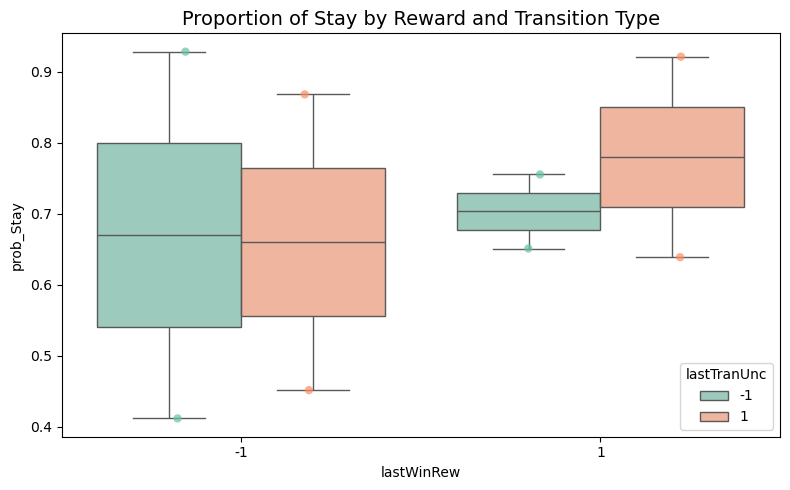

In [8]:
# Plot the proportion of stay by reward and transition type for each participant
box_plots(grouped_data, "lastWinRew", "prob_Stay", "lastTranUnc", "Proportion of Stay by Reward and Transition Type", palette="Set2")

### 2. Reproduce Fig 3D from Donegan et al. (2024) looking at association of model-based learning with individual differences: age, gender, and education



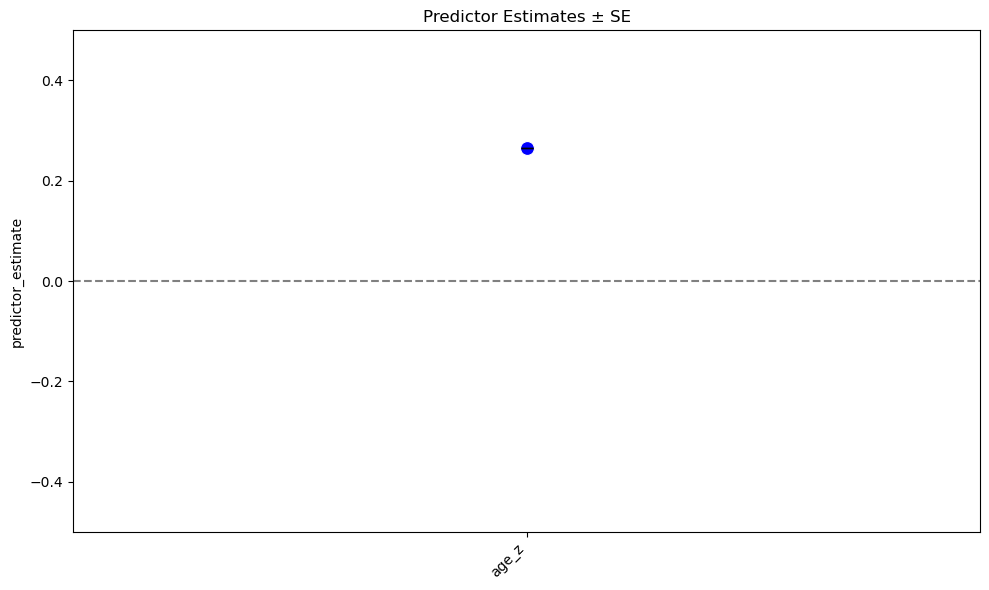

In [9]:
point_plot(modelling_dfs['model_results_donegan_demographic_lm_pilot_09_07_25'])

### 3. Reproduce Fig 3E from Donegan et al. (2024) looking at looking at association of model-based learning with mental health symptoms

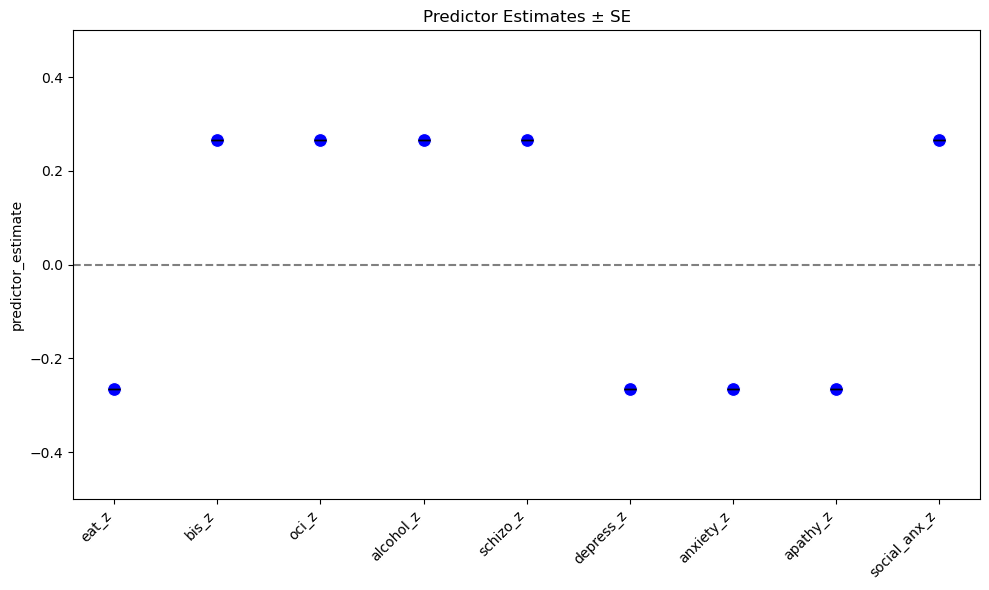

In [10]:
point_plot(modelling_dfs['model_results_donegan_symptom_lm_pilot_09_07_25'])

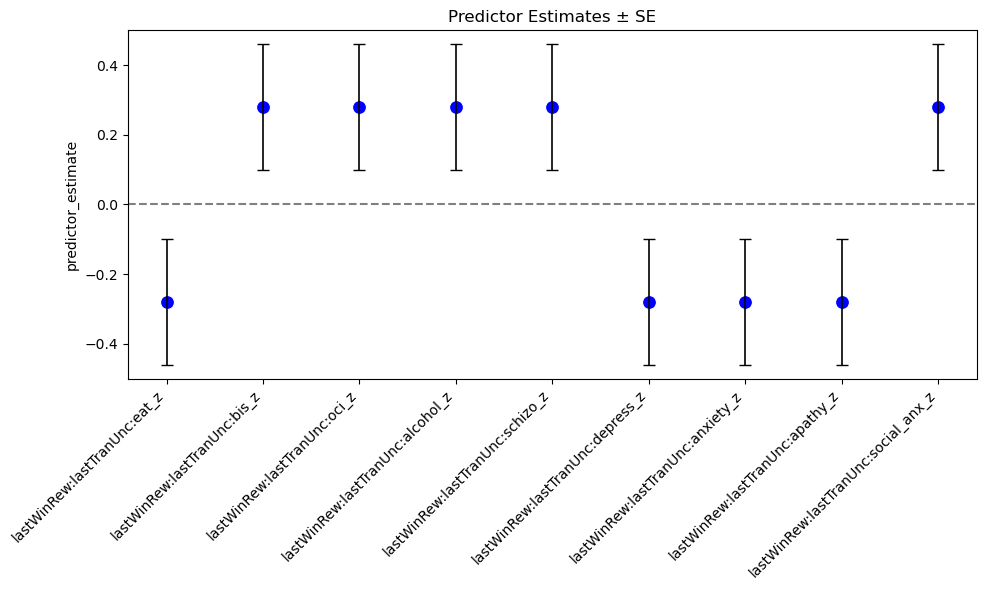

In [11]:
point_plot(modelling_dfs['model_results_gillan_symptom_glmer_pilot_09_07_25'])

### Correlations of model-basedness and demographic factors


In [12]:
# Merge demographic and model-based score for each participant

dem_quest_df = dem_quest_dfs[f'merged_dem_quest_{study}']
base_model_df = modelling_dfs[f'model_results_gillan_baseline_glmer_{study}']

# Merge on 'participant_id' to add modelBased_estimate
correlation_df = dem_quest_df.merge(
    base_model_df[['participant_id', 'modelBased_estimate']],  # Only necessary columns
    on='participant_id',
    how='left'  # Keep all rows from df_dem_quest
)

# Check result
correlation_df

,study,participant_id,age,gender,ethnicity,ocir_overall,alcohol_overall,social_overall,bis_overall,neutral_overall,depress_overall,eat_overall,schizo_overall,iq_overall,anxiety_overall,apathy_overall,mh_past,mh_current,fam_mh_past,modelBased_estimate
0,pilot,66d31a1b0515fe747830bab9,60,1,"White: English, Welsh, Scottish, Northern Iris...",23,12,50,70,32,39,4,13,9,48,60,NaN,NaN,NaN,0.477872
1,pilot,572bcdbb34b25a0010ddd977,50,1,"White: English, Welsh, Scottish, Northern Iris...",13,11,39,47,40,45,6,11,10,53,62,NaN,NaN,"['Major Depression', 'Alcohol Dependence', 'Su...",-0.052264


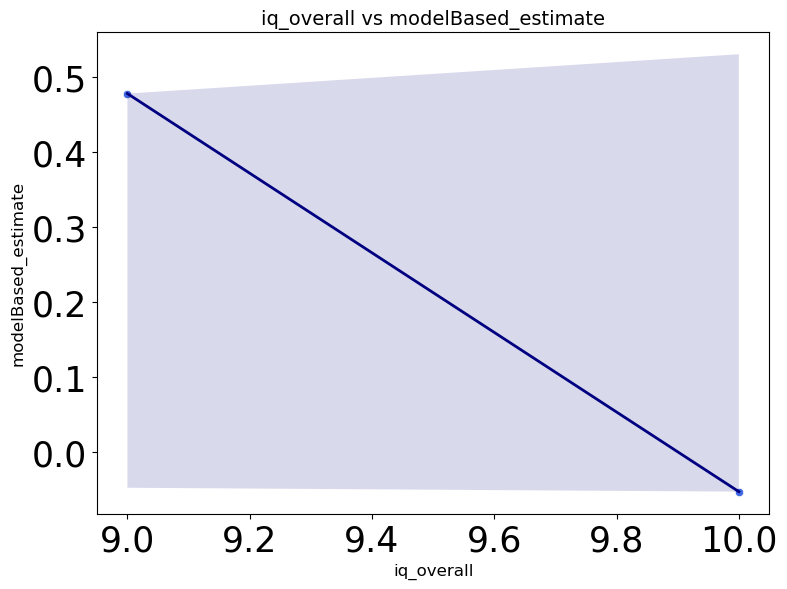

Correlation (iq_overall vs modelBased_estimate): r = -1.00, p = 1, n = 2
The mean value for the Bottom_25 is 0.477872238737412
The mean value for the Top_25 is -0.0522642986987081
The std value for the Bottom_25 is nan
The std value for the Top_25 is nan


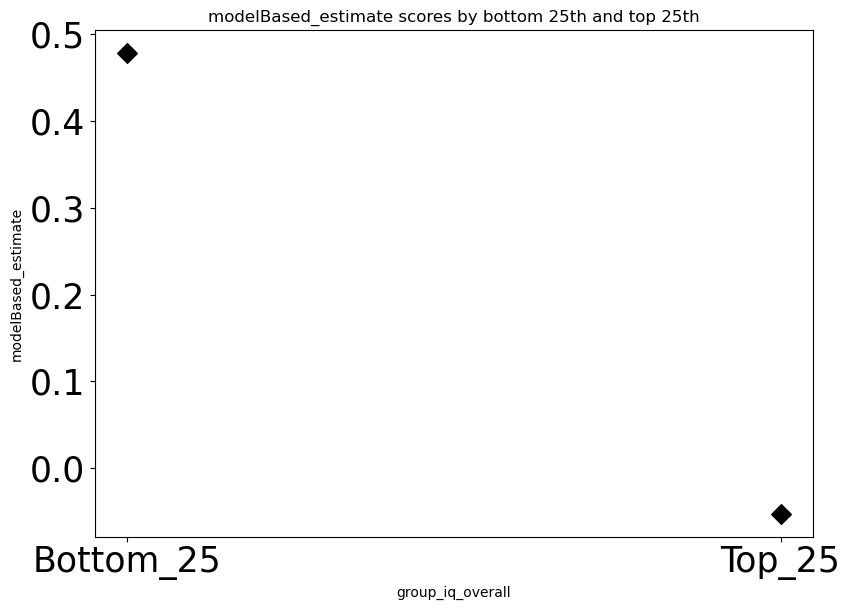

T-statistic: nan, df: 0, p-value: nan, Cohen's d: nan, n_Bottom_25: 1, n_Top_25: 1


/opt/anaconda3/envs/TST_Extraction/lib/python3.12/site-packages/scipy/stats/_stats_py.py:6951: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df
/opt/anaconda3/envs/TST_Extraction/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/envs/TST_Extraction/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


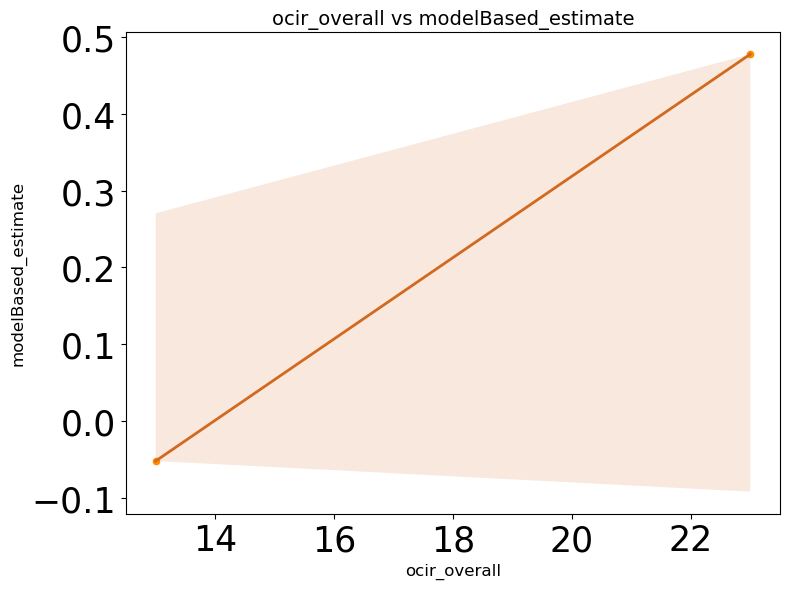

Correlation (ocir_overall vs modelBased_estimate): r = 1.00, p = 1, n = 2
The mean value for the Bottom_25 is -0.0522642986987081
The mean value for the Top_25 is 0.477872238737412
The std value for the Bottom_25 is nan
The std value for the Top_25 is nan


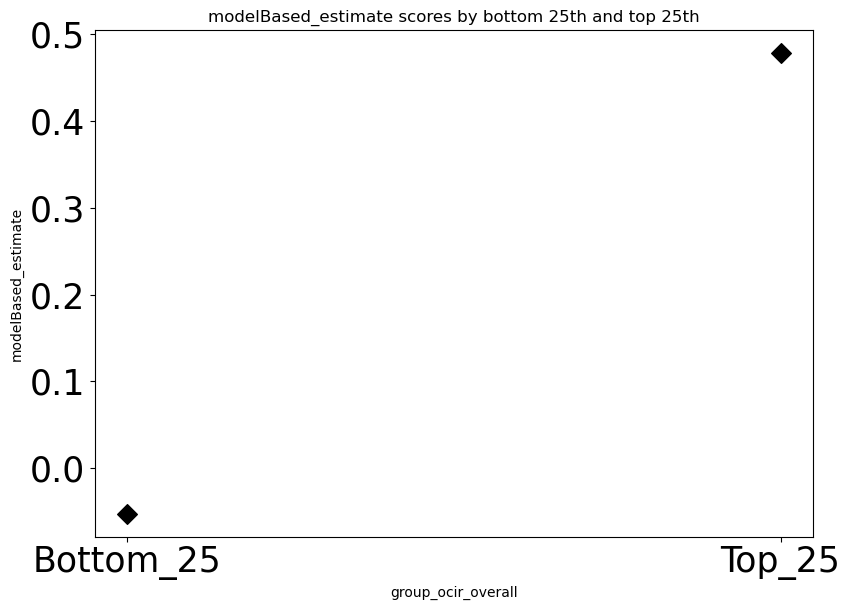

T-statistic: nan, df: 0, p-value: nan, Cohen's d: nan, n_Bottom_25: 1, n_Top_25: 1


/opt/anaconda3/envs/TST_Extraction/lib/python3.12/site-packages/scipy/stats/_stats_py.py:6951: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df
/opt/anaconda3/envs/TST_Extraction/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/envs/TST_Extraction/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [17]:
x_variables = ['iq_overall', 'ocir_overall']
y_variables = ['modelBased_estimate']

color_map = {
    'iq_overall': {
        'dot': 'royalblue',
        'line': 'navy',
        'bottom_25': 'royalblue',
        'top_25': 'royalblue',
    },
    'ocir_overall': {
        'dot': 'darkorange',
        'line': 'chocolate',
        'bottom_25': 'darkorange',
        'top_25': 'darkorange',
    },
}


for x_variable in x_variables:
    for y_variable in y_variables:
        title = f"{x_variable} vs {y_variable}"
        dot_color = color_map[x_variable]['dot']
        line_color = color_map[x_variable]['line']
        bottom_25 = color_map[x_variable]['bottom_25']
        top_25 = color_map[x_variable]['top_25']
        
        scatter_plots(correlation_df, x_variable, y_variable, title, dot_color, line_color)
        pearson_correlation(correlation_df, x_variable, y_variable)
        
        # Update normative_model_test_df with groups for the current x_variable
        correlation_df = group_subjects(correlation_df, x_variable)
        
        strip_chart_with_mean(
            participants_df=correlation_df,
            group_col=f"group_{x_variable}",
            score_col=y_variable,
            title=f"{y_variable} scores by bottom 25th and top 25th",
            bottom_color=bottom_25,
            top_color=top_25
        )
        
        
        indep_t_test(correlation_df, x_variable, y_variable)
